#### Case Study: Colorado River
The Colorado River at Taylor's Ferry carries a significant volume of sediment. Consider the channel slope, $S_0$ = 0.000217, channel width, $b$ = 350 ft, and a water temperature of 70$^\circ$F.

In [114]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family']=['STIXGeneral',
                             'Times New Roman',
                             'DejaVu Serif']
mpl.rcParams['mathtext.fontset'] = 'stix'
################################################################################
# CONSTANTS
g = 32.174 # gravitational acceleration (ft/s2)
gamma = 62.3 # water specific weight (lbf/ft3)
rho = gamma/g # water density (slug/ft3)
s = 2.65 # specific gravity of sediment (-)
nu = 1.052e-5 # water kinematic viscosity (ft2/s)
units = 'USC' # U.S. Customary units
################################################################################
# GIVEN
B = 350. # channel width (ft)
S = 0.000217 # bed slope (-)
D50 = 3. # grain diameter (mm)
H = np.arange(4,13,2)
U = (14.4*(H*S)**0.3)**(1/0.7)
q = U*H
Q = q*B

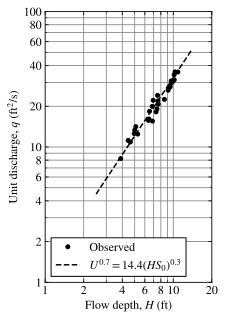

In [108]:
#####################################################################
# COLORADO RIVER AT TAYLOR'S FERRY, DISCHARGE DATA
# DIGITIZED FROM USGS REPORT, MADDOCK (1969)... I think
# DIGITIZED VALUES ARE LOG2(REAL VALUES)
Hd = [1.95983,2.1514,2.20836,2.30973,2.32238,2.35107,2.40158,2.67839,
      2.69142,2.70556,2.77575,2.78266,2.80051,2.87633,2.89964,2.91464,
      2.92152,2.93267,3.09237,3.1875,3.20456,3.24364,3.26655,3.26771,
      3.31037,3.34405,3.34791,3.36753,3.44184]
qd = [3.03662,3.48415,3.44366,3.65119,3.73528,3.82181,3.63831,3.97409,
      4.00955,4.19826,4.31686,3.95721,4.46744,4.18431,4.2552,4.58799,
      4.45186,4.37481,4.49065,4.71445,4.76778,4.8002,4.94464,4.88929,
      4.92977,5.09397,4.97164,5.16557,5.16192]
Hd = 2.**np.array(Hd)
qd = 2.**np.array(qd)
#####################################################################
# COLORADO RIVER AT TAYLOR'S FERRY, SEDIMENT DATA
# FROM JULIEN (2010) EROSION & SEDIMENTATION, CAMBRIDGE UNIV. PRESS
D = np.array([0.062,0.125,0.25,0.5,1,2,4])
Pf = np.array([0.22,1.33,21.4,88.7,98,99,99.5])
phi = -np.log2(D)
#####################################################################
# # PLOT GRADATION
# phi = -np.log2(D)
# phi50 = np.interp(50,Pf,phi)
# D50 = 2.**-phi50
# fig,ax = plt.subplots(figsize=(3.5, 3.5))
# ax.plot(D,Pf, '.-k', ms=15, lw=2.5)
# # ax.plot([0.0625,D50],[50,50], '--r', lw=4, dashes=(2,1))
# # ax.plot([D50,D50],[0,100], '--r', lw=4, dashes=(2,1))
# # ax.plot(D50,50, '.r', ms=25, mfc='w', mec='r', mew=4)
# # ax.text(1.2*D50, 45, '$D_{50} = %4.3f$ mm' % D50, 
# #         ha='left', va='top', backgroundcolor='w')
# # ax.text(1.3*D50, 55, '$\phi_{50} = %4.3f$ mm' % phi50, 
# #         ha='left', va='bottom', backgroundcolor='w')
# ax.set_xscale('log')
# ax.set_xticks(2.**np.arange(-4,3))
# ax.set_yticks(np.arange(0,110,10))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
# ax.tick_params(which='both', direction='in', top=True, right=True)
# ax.tick_params(which='minor', bottom=False, top=False)
# ax.set_xticklabels(ax.get_xticks(), rotation=45)
# ax.grid(which='major', c='lightgray')
# ax.set_xlabel('Grain diameter, $D$ (mm)')
# ax.set_ylabel('Percent finer (%)')
# axphi = ax.twiny()
# axphi.set_xlim(-np.log2(plt.getp(ax,'xlim')))
# axphi.set_xticks(-np.log2(plt.getp(ax,'xticks')))
# axphi.set_xlabel('$\phi$')
# ax.tick_params(which='minor', bottom=False, top=False)
# plt.show()
# # fig.savefig("colo_r_gradation_D50.pdf", bbox_inches='tight')
#####################################################################
fig,ax = plt.subplots(figsize=(3,5))
ax.loglog(Hd,qd, '.k', ms=8, label='Observed')
ax.loglog([2.5,14.],np.array([2.5,14.])*45.165*(np.array([2.5,14.])*S)**0.429,
          '--k', label=r'$U^{0.7}=14.4(HS_0)^{0.3}$')
ax.set_xlim((1,20))
ax.set_ylim((1,100))
ax.set_xticks([1,2,4,6,8,10,20])
ax.set_yticks([1,2,4,6,8,10,20,40,60,80,100])
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.grid(which='both', c='gray')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_ylabel('Unit discharge, $q$ (ft$^2$/s)')
ax.set_xlabel('Flow depth, $H$ (ft)')
ax.legend(loc=3, fancybox=False, edgecolor='k', framealpha=1.)
# ax.axis('equal')
plt.show()
# fig.savefig("colo_r_discharge.pdf", bbox_inches='tight')

In [96]:
################################################################################
# FUNCTIONS
def Dmm_to_Dstar(Dmm=None,nu=1.004e-6,g=9.807,s=2.65,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    return D*((s-1)*g/nu**2)**(1/3)
def settling_velocity(Dmm=None,nu=1.004e-6,g=9.807,s=2.65,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    Dstar = Dmm_to_Dstar(Dmm=Dmm,nu=nu,g=g,s=s,units=units)
    Rep = 8.*(np.sqrt(1+0.0139*Dstar**3)-1)
    return nu/D*Rep
def rect_Rh(B=None,H=None):
    A, P = B*H, B+2*H
    return A/P
def shear_stress(R=None,S=None,gamma=9810):
    return gamma*R*S
def shear_velocity(R=None,S=None,tau=None,g=9.807,rho=997.):
    return np.sqrt(tau/rho) if tau.any() else np.sqrt(g*R*S)
def roughness_height(H=None,U=None,ustar=None):
    return H/((10**(U/ustar/5.75))/12.2)
def grain_shear_factor(H=None,ks=None,D90mm=None,units='SI'):
    D = (D90mm/1000) if (units=='SI') else (D90mm/304.8)
    return (np.log10(12*H/ks)/np.log10(12*H/D))**(3/2)
def shields_number(tau=None,Dmm=None,s=2.65,gamma=9810,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    return tau/gamma/(s-1)/D
def shields_to_shear(tstar=None,Dmm=None,s=2.65,gamma=9810,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    return tstar*gamma*(s-1)*D
def shields_curve(Dmm=None,nu=1.004e-6,g=9.807,s=2.65,units='SI'):
    Dstar = Dmm_to_Dstar(Dmm=Dmm,nu=nu,g=g,s=s,units=units)
    return 0.24/Dstar + 0.055*(1-np.exp(-0.02*Dstar))
def phib_to_qbv(phib=None,Dmm=None,s=2.65,g=9.807,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    return phib*D**(3/2)*np.sqrt((s-1)*g)
def qbv_to_phib(qbv=None,Dmm=None,s=2.65,g=9.807,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    return qbv/D**(3/2)/np.sqrt((s-1)*g)
def qbv_duboys(Dmm=None,tau=None,nu=1.004e-6,g=9.807,gamma=9810,units='SI'):
    tstarc = shields_curve(Dmm=Dmm,nu=nu,g=g,units=units)
    tauc = shields_to_shear(tstar=tstarc,Dmm=Dmm,s=s,gamma=gamma,units=units)
    CDB = 6.9e-6 if (units=='SI') else 0.17
    return CDB/Dmm**(3/4)*tau*(tau-tauc)
def qbv_shields(Dmm=None,tau=None,q=None,S=None,nu=1.004e-6,g=9.807,gamma=9810,units='SI'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    tstarc = shields_curve(Dmm=Dmm,nu=nu,g=g,units=units)
    tauc = shields_to_shear(tstar=tstarc,Dmm=Dmm,s=s,gamma=gamma,units=units)
    return 10.*(gamma*q*S)/((gamma*(s-1))**2*D)*(tau-tauc)
def phib_meyerpetermuller(tstar=None,tstarc=0.047,mu=1.):
    return 8.*(mu*tstar-tstarc)**(3/2)
def phib_vanrijn(Dmm=None,D90mm=None,tstar=None,tstarc=None,H=None,U=None,nu=1.004e-6,g=9.807,units='SI',opt='flat'):
    D = (Dmm/1000) if (units=='SI') else (Dmm/304.8)
    D90 = (D90mm/1000) if (units=='SI') else (D90mm/304.8)
    if opt!='flat':
        ustarp = U/5.75/np.log10(12*H/3/D90)
        tstar = ustarp**2/(s-1)/g/D
    T = tstar/tstarc-1
    Dstar = Dmm_to_Dstar(Dmm=Dmm,nu=nu,g=g,s=s,units=units)
    return 0.053*T**2.1/Dstar**0.3
def qbv_to_qbw(qbv=None,gammas=2650):
    return gammas*qbv


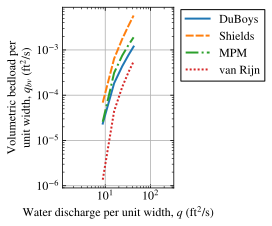

In [100]:
################################################################################
# CALCULATIONS
w0 = settling_velocity(Dmm=D50,nu=nu,g=g,units=units)
Rh = rect_Rh(B=B,H=H)
tau = shear_stress(R=Rh,S=S,gamma=gamma)
ustar = shear_velocity(tau=tau,rho=rho)
ks = roughness_height(H=H,U=U,ustar=ustar)
mu = grain_shear_factor(H=H,ks=ks,D90mm=D50,units=units)
tstar = shields_number(tau=tau,Dmm=D50,s=s,gamma=gamma,units=units)
tstarc = shields_curve(Dmm=D50,nu=nu,g=g,units=units)

qbv_db = qbv_duboys(Dmm=D50,tau=tau,nu=nu,g=g,gamma=gamma,units=units)
qbv_s = qbv_shields(Dmm=D50,tau=tau,q=q,S=S,nu=nu,g=g,gamma=gamma,units=units)
phib_mpm = phib_meyerpetermuller(tstar=tstar,tstarc=tstarc,mu=1.)
qbv_mpm = phib_to_qbv(phib=phib_mpm,Dmm=D50,s=s,g=g,units=units)
phib_vr = phib_vanrijn(Dmm=D50,D90mm=D50,tstar=tstar,tstarc=tstarc,H=H,U=U,nu=nu,g=g,units=units)
qbv_vr = phib_to_qbv(phib=phib_vr,Dmm=D50,s=s,g=g,units=units)

qbw_db = qbv_to_qbw(qbv=qbv_db)
qbw_s = qbv_to_qbw(qbv=qbv_s)
qbw_mpm = qbv_to_qbw(qbv=qbv_mpm)
qbw_vr = qbv_to_qbw(qbv=qbv_vr)

fig,ax = plt.subplots(figsize=(2,3.3333))
ax.set_prop_cycle(linestyle=['-','--','-.','--'],
                  color=['tab:blue','tab:orange','tab:green','tab:red'])
ax.loglog(q,qbv_db, linewidth=2, label='DuBoys')
ax.loglog(q,qbv_s, linewidth=2, label='Shields',dashes=[4,1])
ax.loglog(q,qbv_mpm, linewidth=2, label='MPM')
ax.loglog(q,qbv_vr, linewidth=2, label='van Rijn',dashes=[1,1])
ax.set_xlim((2,200))
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.grid()
ax.set_ylabel('Volumetric bedload per\n'+r'unit width, $q_{bv}$ (ft$^2$/s)')
ax.set_xlabel('Water discharge per unit width, $q$ (ft$^2$/s)')
ax.axis('equal')
ax.legend(fancybox=False, edgecolor='k', framealpha=1.,
         bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.show()
# fig.savefig("bedload_example.pdf", bbox_inches='tight')

In [102]:
data = pd.DataFrame()
data['H'] = H
data['q'] = q
data['Rh'] = Rh
data['tau0'] = tau
data['tau*'] = tstar
data['qbv_db'] = qbv_db
data['qbv_s'] = qbv_s
data['qbv_mpm'] = qbv_mpm
data['qbv_vr'] = qbv_vr

pd.set_option("display.precision", 6)
print(data.to_string(index=False))

  H          q         Rh      tau0      tau*    qbv_db     qbv_s   qbv_mpm    qbv_vr
  4   8.806444   3.910615  0.052868  0.052253  0.000024  0.000069  0.000026  0.000001
  6  15.716633   5.801105  0.078426  0.077514  0.000185  0.000644  0.000313  0.000045
  8  23.705189   7.650273  0.103425  0.102222  0.000436  0.001742  0.000752  0.000152
 10  32.605158   9.459459  0.127883  0.126397  0.000773  0.003433  0.001289  0.000323
 12  42.306039  11.229947  0.151819  0.150054  0.001188  0.005771  0.001901  0.000556


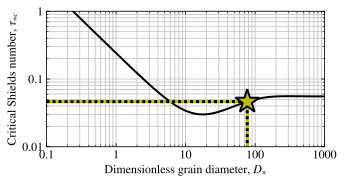

In [56]:
Dstar = Dmm_to_Dstar(Dmm=D50,nu=nu,g=g,s=s,units=units)
tstarc = shields_curve(Dmm=D50,nu=nu,g=g,units=units)

dstp = 10.**np.linspace(-1,4,101)
tstp = 0.24/dstp + 0.055*(1-np.exp(-0.02*dstp))

fig,ax = plt.subplots(figsize=(5,2.5))
ax.loglog(dstp,tstp,'k',lw=2)
ax.loglog([0.1,Dstar,Dstar],[tstarc,tstarc,0.01],'y',lw=3)
ax.loglog([0.1,Dstar,Dstar],[tstarc,tstarc,0.01],'--k',lw=3,dashes=[1,1])
ax.loglog(Dstar,tstarc,'*',c='y',ms=25,mec='k',mew=2)
ax.set_xlim((0.1,1000.))
ax.set_ylim((0.01,1.))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.grid(which='both', c='silver')
ax.tick_params(which='both', direction='in', top=True, right=True)
ax.set_xlabel(r'Dimensionless grain diameter, $D_∗$')
ax.set_ylabel(r'Critical Shields number, $\tau_{∗c}$')
plt.show()
# fig.savefig("critical_shields.pdf", bbox_inches='tight')

In [61]:
Dstar = Dmm_to_Dstar(Dmm=D50,nu=nu,g=g,s=s,units=units)
tstarc = shields_curve(Dmm=D50,nu=nu,g=g,units=units)
tauc = shields_to_shear(tstar=tstarc,Dmm=D50,s=s,gamma=gamma,units=units)
shields_number(tau=shear_stress(R=rect_Rh(B=B,H=4),S=S,gamma=gamma),Dmm=D50,s=s,gamma=gamma,units=units)
q

array([ 8.80644398, 15.71663322, 23.70518928, 32.60515756, 42.30603935])

In [80]:
qbv_vr

array([1.36014546e-06, 4.45752531e-05, 1.51825996e-04, 3.22982429e-04,
       5.56273468e-04])